# Using SpecpolFlow with Multiple Spectra Files: Example $\xi^1$ CMa (HD 46328)

When a star has multiple observations, it is useful to make a loop over the spectra files rather than running each one individually. To obtain outputs of interest, only one cleaned line mask is necessary since all the spectra files are from the same star. With the cleaned mask and .s files, you must loop over the `LSDpy.lsdpy.main()` function to calculate outputs for each inputted spectra file.

In the below tutorial, we will be walking you through how to calculate data from multiple spectra files for the same star. It is recomended you first look through the SpecpolTutorial for additional background on individual steps. We have provided three spectra files (hd46328_test_1.s (ObsId: 2378216p), hd46328_test_2.s (ObsId: TKTKTK), and hd46328_test_3.s (ObsId:TKTKTK)) for $\xi^1$ CMa (HD 46328; [Erba et al. 2021](https://doi.org/10.1093/mnras/stab1454)) and the long list (LongList_T27000G35.dat) from the Vienna Atomic Line Database (VALD; [Ryabchikova et al. 2015](https://ui.adsabs.harvard.edu/abs/2015PhyS...90e4005R/abstract)).

## 0. Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import specpolFlow as pol
import LSDpy

import copy
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

## 1. Creating & Cleaning LSD Line Mask

Below, we specify the name of the VALD long list (only one is needed since all observations are for the same star) and the name and location of our created mask. Next, we remove regions 100 km $\text{s}^{-1}$ (specific to this example) around the Balmer series and Balmer gap. 

In [4]:
# Making the mask file from the VALD line list
input_filename = 'OneObservationFlow_tutorialfiles/LongList_T27000G35.dat'
output_filename = 'OneObservationFlow_tutorialfiles/test_output/T27000G35_depth0.02.mask'
mask = pol.make_mask(input_filename, output_filename, depthCutoff = 0.02, atomsOnly = True)

# Using default regions for cleaning
velrange = 100
ExcludeRegions = pol.get_Balmer_regions_default(velrange) + pol.get_telluric_regions_default()

# cleaning and saving the mask
clean_mask_filename = 'OneObservationFlow_tutorialfiles/test_output/hd46328_test_depth0.02_clean.mask'
mask.clean(ExcludeRegions).save(clean_mask_filename)

missing Lande factors for 160 lines (skipped) from:
['He 2', 'O 2']
skipped all lines for species:
['H 1']


## 2. Create LSD Profile

Here, we create the LSD files for all three spectra file by looping over all three file names.

In [10]:
# Creating a template for the filenames
obsfile = 'OneObservationFlow_tutorialfiles/hd46328_test_{}.s'
lsdfile = 'OneObservationFlow_tutorialfiles/test_output/hd46328_test_{}.lsd'

for i in range(0,3):
    lsd, mod = pol.run_lsdpy(obs = obsfile.format(i+1), 
            mask = clean_mask_filename, outName = lsdfile.format(i+1), 
            velStart = - 100.0, velEnd = 100.0, velPixel = 2.6, 
            normDepth = 0.2, normLande = 1.2, normWave = 500.0,
            fLSDPlotImg=0)

Average observed spec velocity spacing: 1.808983 km/s
using a 78 point profile with 2.600000 km/s pixels
mean mask depth 0.098431 wl 491.722 Lande 1.181640 (from 1124 lines)
mean mask norm weightI 0.492157 weightV 0.467464
saving model spectrum to  ...
I reduced chi2 437.0543 (chi2 34454741.31 constraints 78912 dof 78)
 Rescaling error bars by: 20.905844
V reduced chi2 1.1296 (chi2 89053.92 constraints 78912 dof 78)
 Rescaling error bars by: 1.062845
 removing profile continuum pol: -7.3909e-06 +/- 7.6026e-09 (avg err 8.6890e-05)
N1 reduced chi2 1.1035 (chi2 86992.46 constraints 78912 dof 78)
 Rescaling error bars by: 1.050471
 removing profile continuum pol: -3.2959e-07 +/- 7.4266e-09 (avg err 8.5879e-05)
line range estimate -14.200000000000188 42.99999999999969 km/s
V in line reduced chi^2 75.819728 (chi2 1668.034020) 
 detect prob 1.000000 (fap 0.000000e+00)
 Detection! V (fap 0.000000e+00)
 V outside line reduced chi^2 1.549604 (chi2  77.480215) 
 detect prob 0.992374 (fap 7.625589

We can also output a .pdf with all the LSD plots for each observation which is useful for ensuring that the LSD profiles look as expected. 

Also note that `%%capture` suppresses the cell's output.

In [12]:
%%capture
with PdfPages('OneObservationFlow_tutorialfiles/test_output/hd46328_test.pdf') as pdf:

    file = 'OneObservationFlow_tutorialfiles/hd46328_test_{}.s'
    outfile = 'OneObservationFlow_tutorialfiles/test_output/hd46328_test_{}.lsd'

    for i in range(0,3):

        lsd = pol.read_lsd(outfile.format(i+1))
        fig, ax = lsd.plot()

        fig.suptitle('HD46328 test' + '-'+ str(i+1),y = 0.92)
        pdf.savefig(fig)

## 3. Bz Calculation

We can then repeat the above steps for the Bz calculation. Note that each observation has a different `vrad`. One method to resolve this is to make a `vrad` array and put that inside the loop as done below. 

using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line


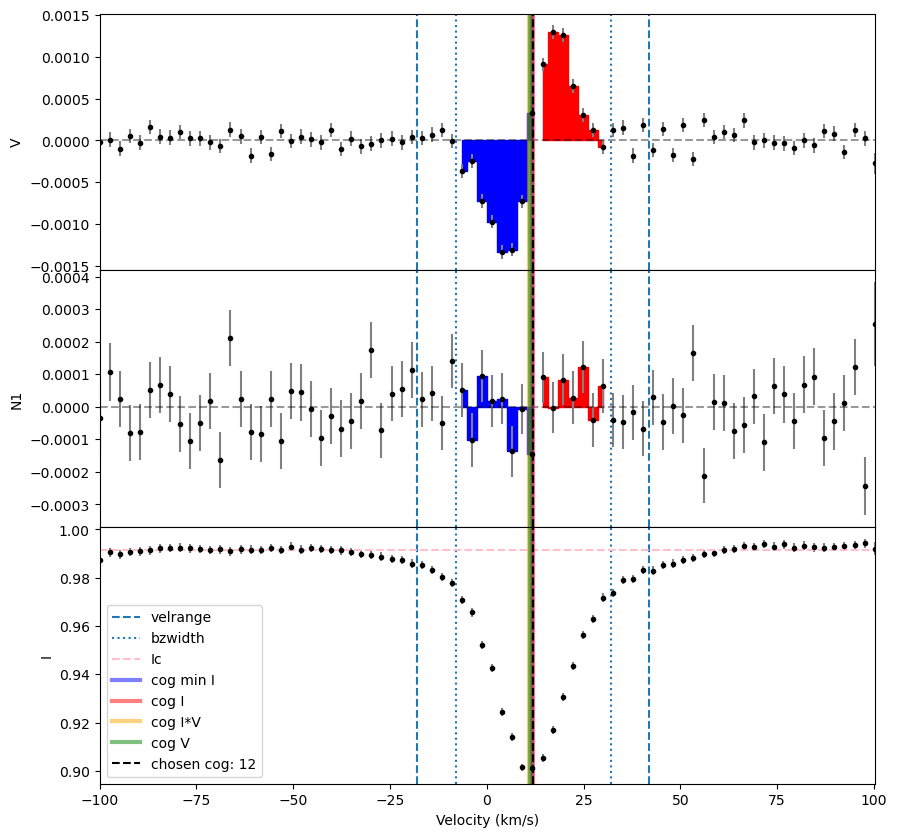

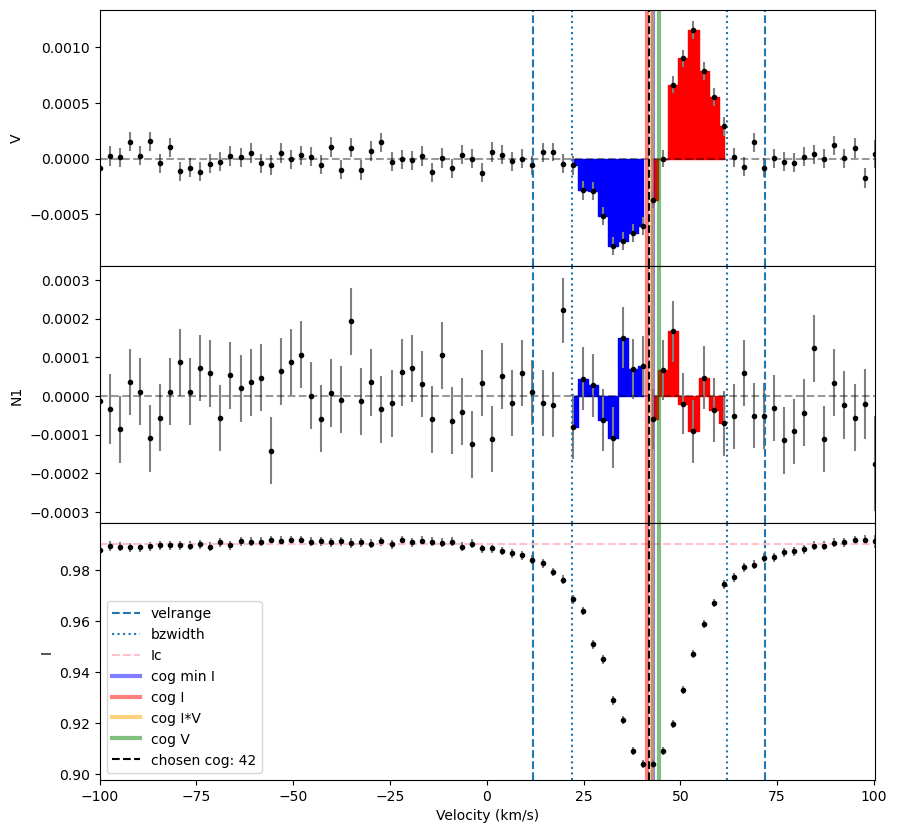

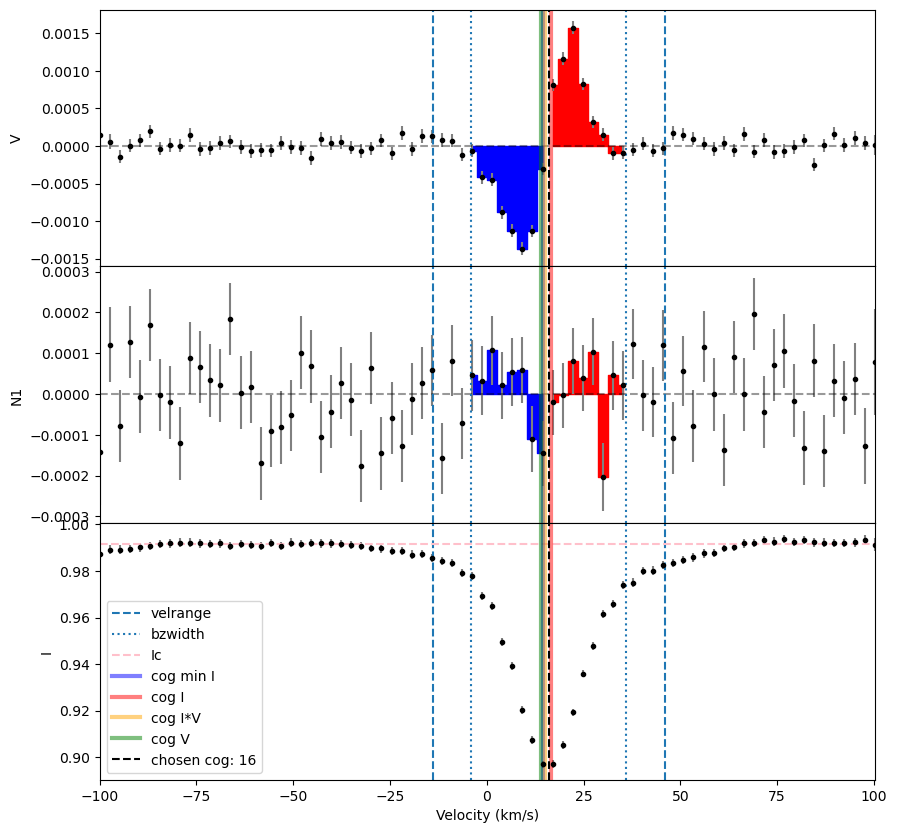

In [15]:
# Bz calculation using manual cog selection
star = 'hd46328'
vsini = 20
vrad = [12,42,16]

for i in range(3):
    lsdpath = 'OneObservationFlow_tutorialfiles/test_output/hd46328_test_{}.lsd'
    velrange = [vrad[i]-30,vrad[i]+30]
    bzwidth = 20
    lsd = pol.read_lsd(lsdpath.format(i+1))
    
    Bz, fig = lsd.calc_bz(cog = vrad[i], velrange = velrange, plot = True, bzwidth = bzwidth)

using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line


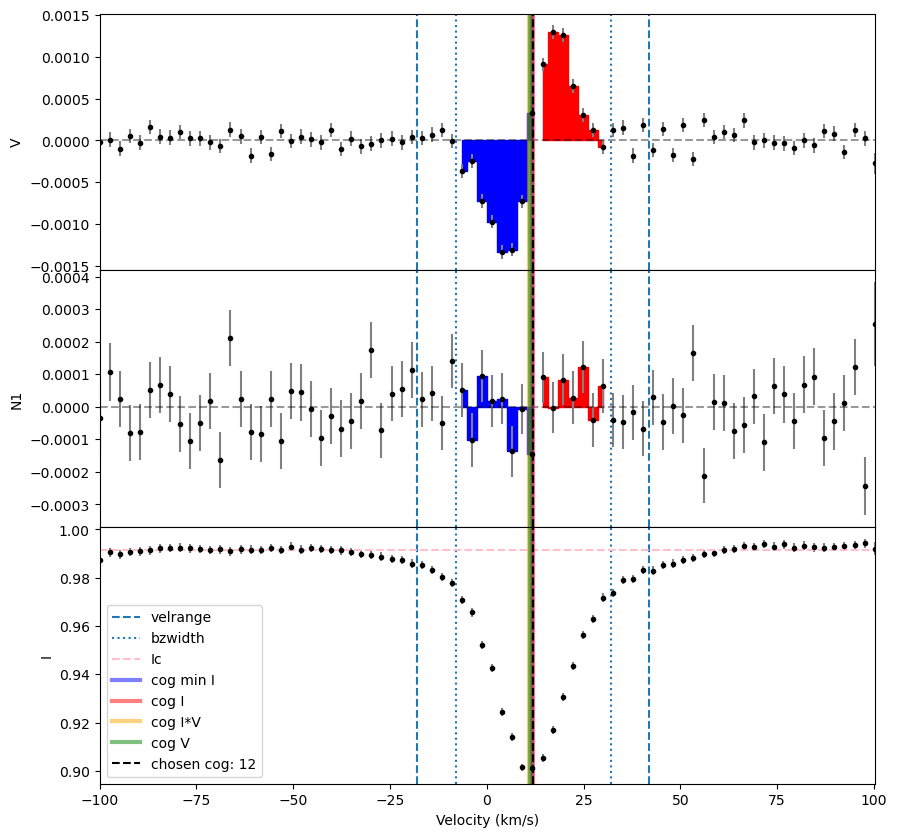

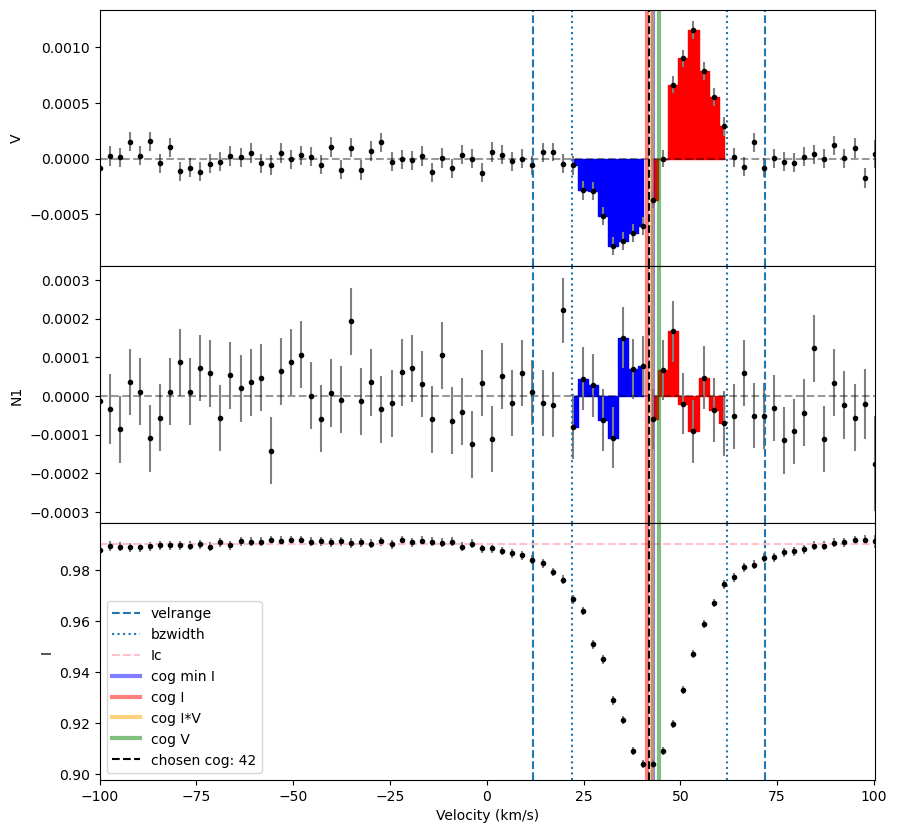

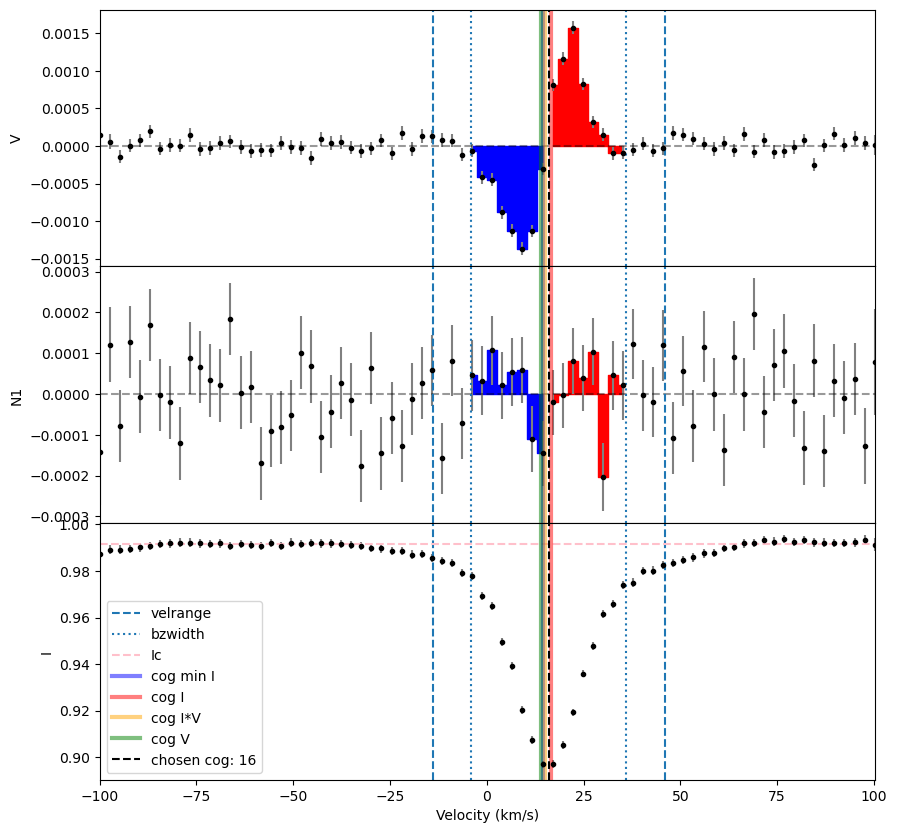

In [17]:
# Bz calculation using manual cog selection
star = 'hd46328'
vsini = 20
vrad = vrad = [12,42,16]

start = 0
for i in range(3):
    lsdpath = 'OneObservationFlow_tutorialfiles/test_output/hd46328_test_{}.lsd'
    velrange = [vrad[i]-30,vrad[i]+30]
    bzwidth = 20
    lsd = pol.read_lsd(lsdpath.format(i+1))
    Bz, fig = lsd.calc_bz(cog = vrad[i], velrange = velrange, plot = True, bzwidth = bzwidth)
    Bz = pd.DataFrame.from_dict(Bz,'index').T
    Bz.insert(0,"Star", star, True)
    if start == 0:
        Bz_table = copy.copy(Bz)
        start = 1
    else:
        Bz_table = pd.concat([Bz_table, Bz], ignore_index = True)

As before, we can also make a .pdf for all the Bz plots.

In [18]:
%%capture
start = 0
with PdfPages('OneObservationFlow_tutorialfiles/test_output/hd46328_test_Bz.pdf') as pdf:

    # Bz calculation using manual cog selection
    star = 'hd46328'

    vsini = 20
    vrad = vrad = [12,42,16]

    for i in range(3):
        lsdpath = 'OneObservationFlow_tutorialfiles/test_output/hd46328_test_{}.lsd'
        velrange = [vrad[i]-30,vrad[i]+30]
        bzwidth = 20
        lsd = pol.read_lsd(lsdpath.format(i+1))
        Bz, fig = lsd.calc_bz(cog = vrad[i], velrange = velrange, plot = True, bzwidth = bzwidth)
        
        Bz = pd.DataFrame.from_dict(Bz,'index').T
        Bz.insert(0,"Star", star, True)
        if start == 0:
            Bz_table = copy.copy(Bz)
            start = 1
        else:
            Bz_table = pd.concat([Bz_table, Bz], ignore_index = True)
        fig.suptitle('{} - {}'.format(star,i+1),fontsize = 20,y = 0.92)
            
        pdf.savefig(fig)


Often times we also want to output a single table of all the Bz outputs for each observation rather than a different table for each observation. Below is a single output table with the Bz outputs for every observation in the loop.

In [19]:
Bz_table

,Star,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,hd46328,0.991645,12.0,-8.0,32.0,-114.836837,5.455003,0.0,-4.390382,5.315775,0.337178,0.0,0.0,0.0
1,hd46328,0.990351,42.0,22.0,62.0,-115.996577,5.807089,0.0,1.034032,5.696148,0.294162,0.0,0.0,0.0
2,hd46328,0.991484,16.0,-4.0,36.0,-110.271155,6.056038,0.0,4.274718,5.885832,0.292775,0.0,0.0,0.0
